# Arrays as images, images as arrays


You can consider arrays as images, and images as arrays.

We start off with our usual imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's make an array of numbers between 0 through 99:

In [2]:
an_array = np.array([[ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0,  9, 99, 99, 94,  0],
                     [ 0,  0,  0, 25, 99, 99, 79,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0],
                     [ 0,  0,  0, 56, 99, 99, 49,  0],
                     [ 0,  0,  0, 73, 99, 99, 31,  0],
                     [ 0,  0,  0, 91, 99, 99, 13,  0],
                     [ 0,  0,  9, 99, 99, 94,  0,  0],
                     [ 0,  0, 27, 99, 99, 77,  0,  0],
                     [ 0,  0, 45, 99, 99, 59,  0,  0],
                     [ 0,  0, 63, 99, 99, 42,  0,  0],
                     [ 0,  0, 80, 99, 99, 24,  0,  0],
                     [ 0,  1, 96, 99, 99,  6,  0,  0],
                     [ 0, 16, 99, 99, 88,  0,  0,  0],
                     [ 0,  0,  0,  0,  0,  0,  0,  0]])
print(an_array)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  9 99 99 94  0]
 [ 0  0  0 25 99 99 79  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0 56 99 99 49  0]
 [ 0  0  0 73 99 99 31  0]
 [ 0  0  0 91 99 99 13  0]
 [ 0  0  9 99 99 94  0  0]
 [ 0  0 27 99 99 77  0  0]
 [ 0  0 45 99 99 59  0  0]
 [ 0  0 63 99 99 42  0  0]
 [ 0  0 80 99 99 24  0  0]
 [ 0  1 96 99 99  6  0  0]
 [ 0 16 99 99 88  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In fact this array represents a monochrome picture of a letter.

We can show arrays as images using the ``plt.imshow`` command from
matplotlib_. Here is the default output:

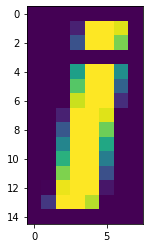

In [3]:
plt.imshow(an_array);

If you have a version of matplotlib older than version 2.0, this image will
look rather blurry. This is because matplotlib is drawing an image with many
more pixels than the array has values. For the pixels in-between array values,
older matplotlib has a default of using `linear interpolation`_ to estimate a
good pixel value. We can turn off this blurring effect by using `nearest
neighbor interpolation`_ instead of linear interpolation:

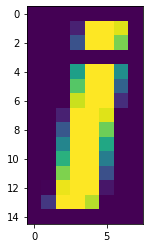

In [4]:
plt.imshow(an_array, interpolation='nearest');

``nearest`` interpolation is the default value for matplotlib 2.0 and later.
If you have an older matplotllib and you'd like ``nearest`` interpolation to
be the default for the current session, use:

In [5]:
# Set nearest neighbor interpolation by default
plt.rcParams['image.interpolation'] = 'nearest'

The image is weirdly colorful. That is because matplotlib is using the default
*colormap*. A colormap is a mapping from values in the array to colors. In
matplotlib < 2.0 the default colormap is called ``jet`` and maps low numbers
in the image (0 in our case) to blue, and high numbers (99 in our case) to
red. For matplotlib version 2.0 and above the default colormap is called
``viridis``.  ``viridis`` maps low numbers to purple and high numbers to
yellow.

We can see the relationship of the numbers to the colors by asking matplotlib
to show the colormap:

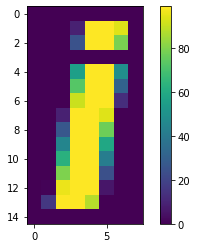

In [6]:
# Nearest interpolation is now the default
plt.imshow(an_array)
plt.colorbar()

In our case, our image would make more sense as grayscale, so we use the
``gray`` colormap, like this:

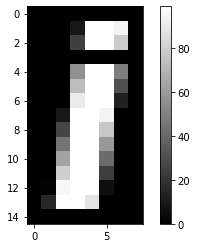

In [7]:
plt.imshow(an_array, cmap='gray')
plt.colorbar()

A grayscale image is an array containing numbers giving the pixel intensity
values - in our case between 0 and 99.

Here we set ``gray`` to the default colormap for the rest of our plots:

.. nbplot::

In [8]:
# Set 'gray' as the default colormap
plt.rcParams['image.cmap'] = 'gray'

We can also plot lines in matplotlib. For example, we might want to plot the
values in row 8 from this array.  Because Python indices start at 0, this is
the 9th row of the array.

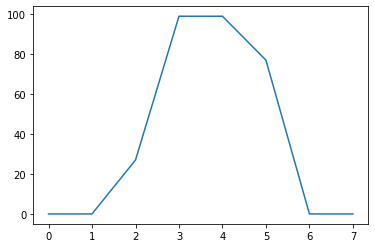

In [9]:
plt.plot(an_array[8])

The x axis is the position in the array (0 through 7) and the y axis is the
value of the array row at that position.

The plot shows us the 0 values at the edges of the bar of the "i", an the ramp
up to the peak at the middle of the bar of the "i", in columns number 3 and 4.

A transpose in numpy uses the ``.T`` method on the array. This has the effect
of flipping the rows and columns (in 2D):

In [10]:
an_array.T

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9, 27, 45, 63, 80, 96, 99,  0],
       [ 0,  9, 25,  0, 56, 73, 91, 99, 99, 99, 99, 99, 99, 99,  0],
       [ 0, 99, 99,  0, 99, 99, 99, 99, 99, 99, 99, 99, 99, 88,  0],
       [ 0, 99, 99,  0, 99, 99, 99, 94, 77, 59, 42, 24,  6,  0,  0],
       [ 0, 94, 79,  0, 49, 31, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

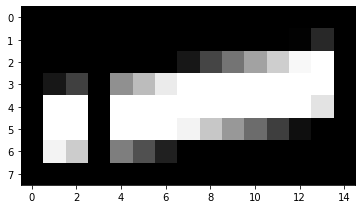

In [11]:
# Defaults of nearest interpolation and gray colormap
plt.imshow(an_array.T)

We can also reshape the original array to a 1D array, by stacking all the rows
end to end:

.. nbplot::

In [12]:
old_shape = an_array.shape
a_1d_array = np.reshape(an_array, old_shape[0] * old_shape[1])
a_1d_array

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 99, 99, 94,  0,  0,
        0,  0, 25, 99, 99, 79,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 56, 99, 99, 49,  0,  0,  0,  0, 73, 99, 99, 31,  0,  0,  0,  0,
       91, 99, 99, 13,  0,  0,  0,  9, 99, 99, 94,  0,  0,  0,  0, 27, 99,
       99, 77,  0,  0,  0,  0, 45, 99, 99, 59,  0,  0,  0,  0, 63, 99, 99,
       42,  0,  0,  0,  0, 80, 99, 99, 24,  0,  0,  0,  1, 96, 99, 99,  6,
        0,  0,  0, 16, 99, 99, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

In [13]:
a_1d_array.shape

(120,)

Reshaping the array to one dimension is a common operation, so there is a
separate numpy command for that, ``np.ravel``:

In [14]:
np.ravel(an_array)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9, 99, 99, 94,  0,  0,
        0,  0, 25, 99, 99, 79,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 56, 99, 99, 49,  0,  0,  0,  0, 73, 99, 99, 31,  0,  0,  0,  0,
       91, 99, 99, 13,  0,  0,  0,  9, 99, 99, 94,  0,  0,  0,  0, 27, 99,
       99, 77,  0,  0,  0,  0, 45, 99, 99, 59,  0,  0,  0,  0, 63, 99, 99,
       42,  0,  0,  0,  0, 80, 99, 99, 24,  0,  0,  0,  1, 96, 99, 99,  6,
        0,  0,  0, 16, 99, 99, 88,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0])

One use of the 1D version of the array, is for making a histogram of the
distribution of values in the array:

(array([75.,  2.,  3.,  1.,  3.,  2.,  1.,  3.,  2., 28.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

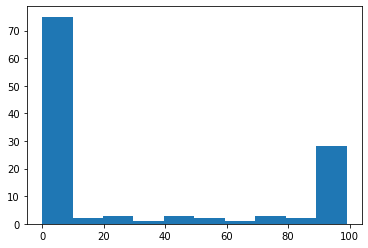

In [15]:
plt.hist(a_1d_array)

By default, the ``plt.hist`` function uses 50 bins, but you can specify how
many bins you want with the ``bins`` keyword:

(array([72.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  0., 24.]),
 array([ 0.  ,  1.32,  2.64,  3.96,  5.28,  6.6 ,  7.92,  9.24, 10.56,
        11.88, 13.2 , 14.52, 15.84, 17.16, 18.48, 19.8 , 21.12, 22.44,
        23.76, 25.08, 26.4 , 27.72, 29.04, 30.36, 31.68, 33.  , 34.32,
        35.64, 36.96, 38.28, 39.6 , 40.92, 42.24, 43.56, 44.88, 46.2 ,
        47.52, 48.84, 50.16, 51.48, 52.8 , 54.12, 55.44, 56.76, 58.08,
        59.4 , 60.72, 62.04, 63.36, 64.68, 66.  , 67.32, 68.64, 69.96,
        71.28, 72.6 , 73.92, 75.24, 76.56, 77.88, 79.2 , 80.52, 81.84,
        83.16, 84.48, 85.8 , 87.12, 88.44, 89.76, 91.08, 92.4 , 93.72,
       

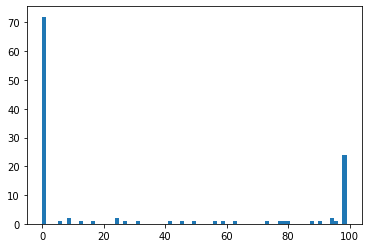

In [16]:
plt.hist(a_1d_array, bins=75)

As you can imagine, it's not hard to go back to the 2D shape, by splitting the
1D array back into 15 rows of 8 values each (and therefore 8 columns):

In [17]:
array_back = np.reshape(a_1d_array, (15, 8))

In numpy, basic operations like multiplication, addition, comparison, are
always elementwise. For example, this multiplies every array value by 10:

In [18]:
an_array * 10

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  90, 990, 990, 940,   0],
       [  0,   0,   0, 250, 990, 990, 790,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 560, 990, 990, 490,   0],
       [  0,   0,   0, 730, 990, 990, 310,   0],
       [  0,   0,   0, 910, 990, 990, 130,   0],
       [  0,   0,  90, 990, 990, 940,   0,   0],
       [  0,   0, 270, 990, 990, 770,   0,   0],
       [  0,   0, 450, 990, 990, 590,   0,   0],
       [  0,   0, 630, 990, 990, 420,   0,   0],
       [  0,   0, 800, 990, 990, 240,   0,   0],
       [  0,  10, 960, 990, 990,  60,   0,   0],
       [  0, 160, 990, 990, 880,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])

Comparison is also elementwise. For example, this gives True for every value >
50, and False for every value <= 50:

In [19]:
an_array > 50

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False,  True,  True,  True, False],
       [False, False, False, False,  True,  True,  True, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False, False,  True,  True,  True, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False,  True,  True,  True, False, False, False],
       [False, False, False, False, False, False, False, False]])

Matplotlib will treat False as 0 and True as 1, so this is one way of
binarizing the image at a threshold (of 50 in this case):

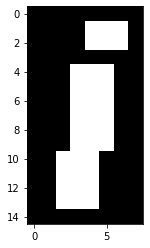

In [20]:
plt.imshow(an_array > 50);

We can slice arrays as we slice strings or lists. The difference for arrays is
that we can slice in any or all dimensions at the same time.  For example, to
get the dot of the "i" it looks (from the numbers at the sides of the ploat)
that we want to the top 4 rows, and the last 5 columns:

In [23]:
an_array[0:4, 3:]

array([[ 0,  0,  0,  0,  0],
       [ 9, 99, 99, 94,  0],
       [25, 99, 99, 79,  0],
       [ 0,  0,  0,  0,  0]])

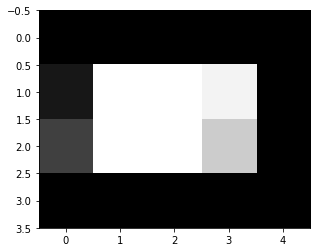

In [24]:
plt.imshow(an_array[0:4, 3:]);